# Enclosing Polygons Problem
One popular question of geometry involves taking 3 points on the circumference of a circle and forming a triangle (probably a scalene one) with the 3 points as the vertices. The question becomes whether or not this triangle will enclose the center of the circle. Two differing example of this are given below. 
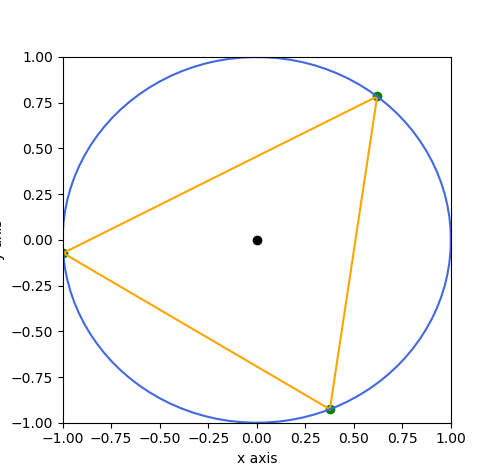
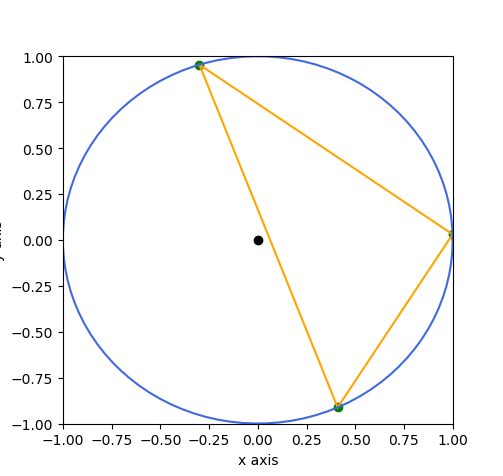
A related statistical problem is to find the probability that this will happen with 3 $\textit{random}$ points on the circumference. Quite elegantly, this probability comes out to be exactly 25%. Naturally one can generalize this with regard to N random points. Intuitively, this probability of enclosure should approach 100% for large N, since each added vertex gives the resulting polygon more of a chance to enclose the center.

It can be shown that the enclosure probability, P, can be found analytically as:

$P_N = 1 - \frac{N}{2^{N-1}}$

Below is a method of verifying this formula by Monti Carlo simulation.

In [20]:
import matplotlib.pyplot as pyt 
import numpy as np
import matplotlib as mpl
import random as r

# Here we define a function that similates one random polygon with N vertices. It returns a 1 if the polygon encloses the center
# and a 0 if it does not. It can also plot the polygon if told to do so.
def enclose_center(N,plotting=0):
    
    # Assigns N random angles between 0 and 2*pi, and puts them in increasing order
    theta = np.zeros(N)
    for i in range(N):
        theta[i] = 2*np.pi*r.random()
    theta = np.sort(theta)
    
    # Defines the N vertices on the unit circle based on their angles
    pts = np.zeros([len(theta),2])
    for i, u in enumerate(theta):
        # x comp
        pts[i][0] = np.cos(u)
        # y comp
        pts[i][1] = np.sin(u)
    
    # Defines the N lines which connect the vertices
    t = np.linspace(0,1,100)
    linx = np.zeros([0,1])
    liny = np.zeros([0,1])
    dth = np.zeros([N])
    for i in range(N):
        # Finds differences in theta
        if i == 0:
            j = N - 1
            dth[i] = theta[i] - theta[j] + 2*np.pi
        else:
            j = i - 1
            dth[i] = theta[i] - theta[j]
        # line goes from j to i, and is calculated as x and y
        x = (pts[i,0] - pts[j,0])*t + pts[j,0] 
        y = (pts[i,1] - pts[j,1])*t + pts[j,1] 
        x = np.resize(x,[len(x),1])
        y = np.resize(y,[len(y),1])
        # line is saved here
        linx = np.concatenate([linx, x], axis = 0 )
        liny = np.concatenate([liny, y], axis = 0 )
    # Defines the circumerence
    circ_x = np.cos(2*np.pi*t)
    circ_y = np.sin(2*np.pi*t)
    
    if plotting == 1:    
        pyt.scatter(pts[:,0],pts[:,1],c = 'g')
        pyt.plot(linx,liny,c = 'orange')
        pyt.plot(circ_x,circ_y,c = 'royalblue')
        pyt.scatter(0,0,c = 'k')
        pyt.xlim((-1,1))
        pyt.ylim((-1,1))
        pyt.xlabel('x axis')
        pyt.ylabel('y axis')
        pyt.axis('equal')
    # Enclosure logic statement
    if any(d > np.pi for d in dth):
        return 0
    else:
        return 1


Here we defined N random angles on a circle, and thus N random differences in those angles. Notice that the only condition needed to satisfy the enclosure is that $\textit{none}$ of the differences in these angles were greater than $\pi$.

Sorry. No dice.


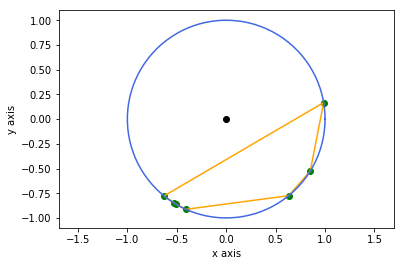

In [21]:
N = 7

# To plot one random iteration
res = enclose_center(N,1)
if res == 1:
    print('It seems like this does enclose the center!')
else:
    print('Sorry. No dice.')

In [22]:
### Verifying our formula with multiple iterations
it = 10000
# possible number of verices to check
nums = np.arange(3,6,1)
rate = np.zeros(len(nums))
for j, N in enumerate(nums):
    res = np.zeros([it])
    for i in range(it):
        res[i] = enclose_center(N,0)
    # Simulated enclosure probability
    rate[j] = sum(res)/it
# Analytical Probability
P_N = 1 - nums/2**(nums - 1)
print(f'For {it} iterations, and {len(nums)} N values: {nums}')
print(f'Simulated Probabilities: rate =  {rate}')
print(f'Analytical Probabilities: P_N =  {P_N}')


For 10000 iterations, and 3 N values: [3 4 5]
Simulated Probabilities: rate =  [ 0.2521  0.504   0.6835]
Analytical Probabilities: P_N =  [ 0.25    0.5     0.6875]
